# **Random maze generator and solver**

## Introduction

There are many algorithms for randomly generating mazes out there (see [1]). Here, we focus on resorting to the the recursive backtracker as described in [2] for generating the maze. It is one of (if not the) most famous algorithm used for this purpose. It requries memory that is proportional to the size of the maze O(n) (see [5]). We first have to define the number of columns and rows (here, ncols=nrows). The algorithm will do the rest and plot the maze.

## Output
### Maze generation

The maze is randomly generated via the recursive backtracker algorithm.

### Pathway plotting

In order to use Djikstra;s algorithm to solve the maze, we first need to compute all the possible pathways and represent it into a graph.

### Solver

Solving the randomly generated maze is done via Dijkstra's algorithm, an algorithm for finding the shortest paths between nodes in a graph.

## References

1. [Perfect maze generators](http://people.cs.ksu.edu/~ashley78/wiki.ashleycoleman.me/index.php/Perfect_Maze_Generators.html)
1. [Recursive backtracker](http://people.cs.ksu.edu/~ashley78/wiki.ashleycoleman.me/index.php/Recursive_Backtracker.html)
1. [Breadth-first search](https://courses.cs.washington.edu/courses/cse326/03su/homework/hw3/bfs.html)
1. [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm#Pseudocode)
1. [Big-O notation](http://bigocheatsheet.com/)

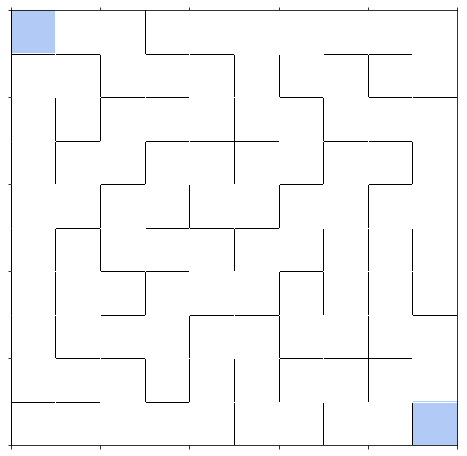

In [10]:
import numpy as np
from random import choice
from itertools import product
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import matshow
import matplotlib.animation as animation
# To display animations via HTML5
from IPython.display import HTML

############################################################################################
"""
Parameters & matrices
"""
# Set numpy random generator seed
np.random.seed(1993)
# Set maze matrix size
ncol = 10
nrow = 10
# Create and fill the maze matrix with "0000" (meaning there are no walls)
maze = np.full(shape=(nrow, ncol), fill_value="0000")
# Create the "visited" matrix with boolean values (0 - unvisited; 1 - visited)
visited = np.zeros(shape=(nrow, ncol), dtype=int)
# Create coordinates list
coords = [(row, col) for row in range(nrow) for col in range(ncol)]
# Create the neighbours dictionary (for each cell, there is a list of its neighbouring cells)
neighbours = {}
for cell in coords:
    i = {}
    for dx in range(-1, 2, 1):
        for dy in range(-1, 2,  1):
            x = cell[0] + dx
            y = cell[1] + dy
            # Exclude cells outside of maze (negative coord)
            # (...) diagonal movements (+/-1, +/-1) (4 combinations)
            # (...) current cell
            # (...) cells that are out of the maze (positive coord)
            if  x >= 0 and y >= 0:
                if (dx, dy) != (0, 0):
                    if (dx, dy) not in list(product((1, -1), repeat=2)):
                        if x <= max([coord[0] for coord in coords]):
                            if y <= max([coord[1] for coord in coords]):
                                i[(x, y)] = 0
    neighbours[cell] = i

# Set maze outer box limits
maze[0, ...] = "1000" # N
maze[nrow-1, ...] = "0100" #S
maze[..., ncol-1] = "0010" #E
maze[..., 0] = "0001" #W
# Set edges of maze
maze[0, 0] = "1001" #NW
maze[nrow-1, ncol-1] = "0110" #SE
maze[0, ncol-1] = "1010" #NE
maze[nrow-1, 0] = "0101" #SW

# Set movement values: N (north), S (south), E (east), or W (west)
compass = {"N": 1, "S": 2, "E": 3, "W": 4}
"""
N - 1xxx
S - x1xx
E - xx1x
W - xxx1
"""

# Create current cell list
cells = [np.array([0, 0])]
# Start from the NW edge of the maze
visited[0, 0] = 1
# Track the direction of the carving
dir_tracker = []

# Compute wall permutations
wall_perm = list(product((0, 1), repeat=4)) # "4" because the wall is set in the form "xxxx" (e.g. "1001")
# Create the possible directions dictionary
dir_dict = {}
for perm in wall_perm:
    dir_dict["".join([str(i) for i in perm])] = [pos+1 for pos, char in enumerate(perm) if char == 0]

############################################################################################

def direction(cells):
    # Compute available movement (e.g. NW edge cannot go N or W)
    avail_dir = dir_dict[maze[cells[-1][0], cells[-1][1]]]
    z = {1: [-1, 0], 2: [1, 0], 3: [0, 1], 4: [0, -1]}
    avail_dir = [i for i in avail_dir if visited[cells[-1][0] + z[i][0], cells[-1][1] + z[i][1]] == 0]
    global rand_dir
    try:
        rand_dir = choice(avail_dir)
    except IndexError as error:
        # Go to latest cell with available movements
        try:
            for i, cell in reversed(list(enumerate(cells))):
                avail_dir = dir_dict[maze[cell[0], cell[1]]]
                avail_dir = [i for i in avail_dir if visited[cell[0] + z[i][0], cell[1] + z[i][1]] == 0]
                # If this cell has not movement(s), go to previous one(s) until one with available movement(s) is found
                if not avail_dir:
                    pass
                else:
                    cells.append(cell)
                    visited[cell[0], cell[1]] = 1
                    rand_dir = choice(avail_dir)
                    return cells
        except IndexError as error:
            print(str(error), ": no further unvisited cells! Maze is complete")
            return

def generate_data(i):
    # While maze not complete, do...
    while list(np.argwhere(visited == 0)):
        direction(cells)
        try:
            if rand_dir == compass["N"]:
                # if wall in N-direction, avoid; otherwise, go
                # Plot punch in the wall
                plt.plot([cells[-1][1], cells[-1][1]+1], [nrow-cells[-1][0], nrow-cells[-1][0]], "white", linewidth=1)
                current_cell = cells[-1] - np.array([1, 0])
            elif rand_dir == compass["S"]:
                plt.plot([cells[-1][1], cells[-1][1]+1], [nrow-cells[-1][0]-1, nrow-cells[-1][0]-1], "white", linewidth=1)
                current_cell = cells[-1] + np.array([1, 0])
            elif rand_dir == compass["E"]:
                plt.plot([cells[-1][1]+1, cells[-1][1]+1], [nrow-cells[-1][0], nrow-cells[-1][0]-1], "white", linewidth=1)
                current_cell = cells[-1] + np.array([0, 1])
            elif rand_dir == compass["W"]:
                plt.plot([cells[-1][1], cells[-1][1]], [nrow-cells[-1][0], nrow-cells[-1][0]-1], "white", linewidth=1)
                current_cell = cells[-1] - np.array([0, 1])
            # Update visited matrix
            cells.append(current_cell)
            visited[cells[-1][0], cells[-1][1]] = 1
            # Update neighbour link (on boths sides; e.g. (0,1) -> (1,1) and (1,1) -> (0,1))
            neighbours[cells[-2][0], cells[-2][1]][(cells[-1][0], cells[-1][1])] = 1
            neighbours[cells[-1][0], cells[-1][1]][(cells[-2][0], cells[-2][1])] = 1
            # Convert from numeric to cardinal directions (N, S, E, W)
            dir_tracker.append(list(compass.keys())[list(compass.values()).index(rand_dir)])
        except IndexError as error:
            print(error)
        mat.set_data(visited)
        return mat
    # Set start and end of the maze when maze is complete
    visited[0,0] = 3
    visited[cells[-1][0], cells[-1][1]] = 3
    mat.set_data(visited)
    return mat

############################################################################################
"""
Plotting and viewing settings
"""
# Create the figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot full maze grid
for row in range(nrow):
    ax.plot([nrow, 0], [row, row], "black", linewidth=1, alpha=1.0)
for col in range(ncol):
    ax.plot([col, col], [0, ncol], "black", linewidth=1, alpha=1.0)
# Set axis limits
ax.set_xlim(left=0, right=ncol)
ax.set_ylim(bottom=0, top=nrow)
# Hide axis values
ax.set_yticklabels([])
ax.set_xticklabels([])

cmap = ListedColormap(["cornflowerblue", "white", "orange", "cornflowerblue"])
mat = ax.matshow(visited, vmin=0, vmax=3, cmap=cmap, extent=(0, ncol, 0, nrow), alpha=0.5, aspect="auto")
anim = animation.FuncAnimation(fig, generate_data, frames=ncol*nrow)
anim.save("maze.gif", writer="pillow")

# Show animation
HTML(anim.to_jshtml())
plt.savefig("maze_1.png")

In [ ]:
import networkx as nx

# Create graph
G=nx.Graph()

for cell in neighbours:
    # Add the cells
    G.add_node(cell, pos=(cell[1], cell[0]))
    # Add connected cells
    for j, link_state in enumerate(neighbours[cell].values()):
        # If cells are connected, draw link
        if link_state == 1:
            G.add_edge(cell, list(neighbours[cell])[j], color="black", weight=1)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]
# Give different colors to start/end and remaining nodes
cmap = ["lightblue"] * len(coords)
# Source
cmap[0] = "lightgreen"
# Target
cmap[list(G.nodes()).index((cells[-1][0], cells[-1][1]))] = "lightgreen"

import matplotlib.pyplot as plt
# Create the figure
fig, ax = plt.subplots(figsize=(8, 8))
# Need to invert y axis
plt.gca().invert_yaxis()
# Draw the graph
nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), edges=edges, edge_color=colors, width=weights, node_shape="s", node_color=cmap, font_size=8, with_labels=True)

plt.savefig("maze_2.png")

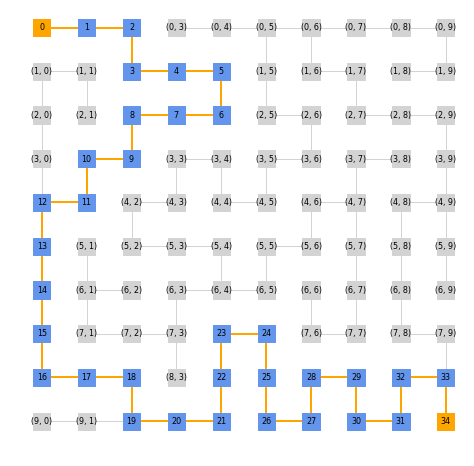

<Figure size 432x288 with 0 Axes>

In [12]:
"""
Solving via Dijkstra's algorithm
"""

# Distance to source dictionary
dist = {}
# Previous
prev = {}
# Queue list (node set)
Q = []

for node in coords:
    # Set (unknown) distance from node to source to infinity
    dist[node] = float('inf')
    prev[node] = 0
    # Initially, all nodes are added to the queue
    Q.append(node)

# Set distance (from source) to source = 0
dist[coords[0]] = 0

while Q:
    # Node in Q with the least distance will be selected first
    u = min([dist for dist in list(dist.keys()) if dist in Q], key=dist.get)
    # Remove u from Q
    Q.remove(u)
    
    # If reached target, terminate
    if u == (cells[-1][0], cells[-1][1]):
        break
    
    # Check linked neighbouring cells
    for neighbour in [i for i in neighbours[u] if neighbours[u][i[0], i[1]] == 1]:
        alt = dist[u] + 1
        # If a shorter path has been found
        if alt < dist[neighbour]:
            dist[neighbour] = alt
            prev[neighbour] = u

# Find shortest path by reverse iteration
s = []
u = (cells[-1][0], cells[-1][1]) # Target
# If the previous node in the path is defined or if the node is the source
if prev[u] != 0 or u == coords[0]:
    while u:
        s.append(u)
        u = prev[u]
# Reverse path to get true path from the source to its target
s = list(reversed(s))

# Update path steps from source to target
mapping = {}
mapping = {key:value for key, value in zip(coords, coords)}
for path_step, node in enumerate(s):
    mapping[node] = path_step
G = nx.relabel_nodes(G, mapping)
# Update colors and weights
cmap = ["cornflowerblue" if isinstance(node, int) else "lightgray" for node in list(G.nodes)]
# Start
cmap[0] = "orange"
# End
# list(G.nodes()).index((cells[-1][0], cells[-1][1]))
cmap[list(G.nodes()).index(path_step)] = "orange"
weights = []
colors = []
for edge in list(G.edges()):
    if isinstance(edge[0], int) is True and isinstance(edge[1], int) is True:
        weights.append(2)
        colors.append("orange")
    else:
        weights.append(1)
        colors.append("lightgray")

# Create the figure
fig, ax = plt.subplots(figsize=(8, 8))
# Need to invert y axis
plt.gca().invert_yaxis()
# Draw the graph
nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), edges=edges, edge_color=colors, width=weights, node_shape="s", node_color=cmap, font_size=8, with_labels=True)
plt.show()
plt.savefig("maze_3.png")